# Results for local code

# 0. Load libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.stats as st
import pickle
import seaborn as sns   

#%matplotlib inline

# Create variables to store

In [4]:
recalculate_if_saved = True
repetitions = 18
number_of_updates = 150
algorithm_list = ['corrective', 'standard', 'preventive']
types_list = ['concurrent']
delay_list = ['1', '10', '100']
repetition_probability_list = ['10']
negation_probability_list = ['0', '10', '30']
# Remove: just For debug purposes
first_time = True

index_list = []
for i in range(150, 3150, 150):
    index_list.append(i)

file_path = 'local/test/results_experiment_'
columns_metrics = ['inconsistencies', 'messages_sent', 'latency_per_operation', 'overhead_data_structure', 'overhead_per_message', 'number_of_reconfigurations', 'total_reconfiguration_time']
new_columns_metrics = ['inconsistencies', 
                       'messages_sent', 
                       'latency_per_operation', 
                       'overhead_data_structure', 
                       'overhead_per_message', 
                       'number_of_reconfigurations', 
                       'total_reconfiguration_time',
                       'result_algorithm',
                       'type',
                       'negation_probability',
                       'delay',
                       'repetition_probability',
                       'update']
file_path_images = '/images/'
current_directory = os.getcwd()

In [5]:
def create_empty_data():
    data = dict()
    data_mean = dict()
    data_var = dict()
    string_name = 'data_frame'
            
    for alg in algorithm_list:
        for ty in types_list:
            for dela in delay_list:
                for rep in repetition_probability_list:
                    for neg in negation_probability_list:
                        var_name = string_name +'_' + alg + '_' + ty +'_delay_' + str(dela) + '_repetition_' + str(rep) + '_negation_' + str(neg)
                        data[var_name] = pd.DataFrame(columns=columns_metrics, index=index_list)    
                        data_mean[var_name] = pd.DataFrame(columns=columns_metrics, index=index_list)    
                        data_var[var_name] = pd.DataFrame(columns=columns_metrics, index=index_list)    
    return data, data_mean, data_var

In [6]:
dataframe_data, dataframe_mean_data, dataframe_var_data = create_empty_data()
all_results = pd.DataFrame(columns=new_columns_metrics)

In [7]:
def add_result(mean_vector, std_vector, var_vector, data):
    var_name = 'data_frame' + '_' + data['algorithm'] + '_' + data['alg_type'] + '_delay_' + data['delay'] + '_repetition_' + data['repetition'] + '_negation_' + data['negation']
    var = dataframe_data[var_name] 
    var_mean = dataframe_mean_data[var_name] 
    var_var = dataframe_var_data[var_name] 
    var.loc[data['update']] = mean_vector
    var_mean.loc[data['update']] = std_vector
    var_var.loc[data['update']] = var_vector

In [8]:
def save_all_dataframes_as_pickle():
    print('Saving....')
    current_directory = os.getcwd()
    path_results = '/saved_dataframes/'
    string_name = 'data_frame'
            
    for alg in algorithm_list:
        for ty in types_list:
            for dela in delay_list:
                for rep in repetition_probability_list:
                    for neg in negation_probability_list:
                            var_name = string_name +'_' + alg + '_' + ty +'_delay_' + str(dela) + '_repetition_' + str(rep) + '_negation_' + str(neg)
                            var = dataframe_data[var_name] 
                            pickle.dump(var, open(current_directory + path_results + var_name +'.p' , "wb"))
                            var_mean = dataframe_mean_data[var_name] 
                            pickle.dump(var_mean, open(current_directory + path_results + var_name +'.p' , "wb"))
                            var_var = dataframe_var_data[var_name] 
                            pickle.dump(var_var, open(current_directory + path_results + var_name +'.p' , "wb"))
                                                                                                                
    pickle.dump(dataframe_data, open(current_directory + path_results + '/single_value/dataframe_data.p' , 'wb'))
    pickle.dump(dataframe_data, open(current_directory + path_results + '/single_value/dataframe_mean_data.p' , 'wb'))
    pickle.dump(dataframe_data, open(current_directory + path_results + '/single_value/dataframe_var_data.p' , 'wb'))
    print('Saved!')

## Compute the values

In [9]:
def compute_and_save_value(result, data):
#     low, high = st.t.interval(alpha=0.95, df=len(result)-1, loc=np.mean(result), scale=st.sem(result)) 
    mean_vector = result.mean(axis=0)
#     if one_time_print == False:
#         print('FIN RESULTADO')                        
#         print(mean_vector)
#         print(str(low[2]) + ', ' + str(high[2]))
#         one_time_print = True
#                                 st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)) 
#                                 For overhead in KB divide by 1000 
#                                 mean_vector = mean_vector / (1000.0)                                
#                                 For the average latency divide the total latency by the reconfigurations                              
#                                 mean_vector = mean_vector / (number_of_updates * (repetition_index + 1))  
    std_vector = result.std(axis=0)
    var_vector = result.var(axis=0)                            
    add_result(mean_vector, std_vector, var_vector, data)                                

    
    

In [10]:
def calculate_values(all_results):    
    new_number = number_of_updates
    one_time_print = False
    for repetition_index in range(0, repetitions):
        file_path = 'local/test/results_experiment_' + str(new_number)
        data = dict()
        data['update'] = number_of_updates * (repetition_index + 1)
        for delay in delay_list:
            data['delay'] = delay
            for repetition_probability in repetition_probability_list:
                data['repetition'] = repetition_probability
                for negation_probability in negation_probability_list:
                    data['negation'] = negation_probability
                    for algorithm in algorithm_list:
                        data['algorithm'] = algorithm
                        for alg_type in types_list:  
                            data['alg_type'] = alg_type
                            str_1 = 'result_algorithm_*' + algorithm + '*_type_*' + alg_type + '*_negationProbability_*' + str(negation_probability)
                            str_2 = '*_delay_*' + str(delay) + '.0*_repetitionProbability_*' + str(repetition_probability) + '*.csv'
                            file_name = str_1 + str_2
                            try:
                                result = pd.read_csv(file_path +'/' + file_name, encoding='utf-8', sep=r'\s*,\s*', header=0, engine='python')                                
                                result['result_algorithm'] = [algorithm]*len(result)
                                result['type'] = [alg_type]*len(result)
                                result['negation_probability'] = [str(negation_probability)]*len(result)
                                result['delay'] = [str(delay)]*len(result)
                                result['repetition_probability'] = [str(repetition_probability)]*len(result)
                                result['update'] = [str( data['update'])]*len(result)
                                
                                for index, row in result.iterrows():                                           
                                    all_results = all_results.append(row, ignore_index=True)                                      
                                compute_and_save_value(result, data)
                            except FileNotFoundError as e:
                                print(e)

        new_number += number_of_updates
    save_all_dataframes_as_pickle()
    return all_results

In [11]:
def load_values():
    print('Loading...')
    path_results = '/saved_dataframes/'
    current_directory = os.getcwd()
    loaded_data = pickle.load(open(current_directory + path_results + '/single_value/dataframe_data.p' , 'rb'))
    loaded_mean_data = pickle.load(open(current_directory + path_results + '/single_value/dataframe_data.p' , 'rb'))
    loaded_var_data = pickle.load(open(current_directory + path_results + '/single_value/dataframe_data.p' , 'rb'))
    print('Loaded!')
    return loaded_data, loaded_mean_data, loaded_var_data

In [12]:
if recalculate_if_saved:
    all_results = calculate_values(all_results)
else:
    dataframe_data, dataframe_mean_data, dataframe_var_data = load_values()

Saving....
Saved!


## Load the results with the correct names

In [13]:
def populate_data_frame_with_correct_names(my_results, my_index, type_exp, my_metric):
    my_indexes = 0
    my_string_corrective = 'data_frame_corrective_' + type_exp
    my_string_preventive = 'data_frame_preventive_' + type_exp
    my_string_standard = 'data_frame_standard_' + type_exp
    
    for dela in delay_list:
        str_del = '_delay_' + str(dela)
        my_dict = dict()
        my_dict['x_values'] = my_index
        for neg in negation_probability_list:
                str_neg = '_negation_' + str(neg)
                if neg == '70':
                    negation_index_list.append(my_indexes)
                for rep in repetition_probability_list:
                    str_rep = '_repetition_' + str(rep)
                    corrective_string = my_string_corrective + str_del + str_rep + str_neg
                    preventive_string = my_string_preventive + str_del +  str_rep + str_neg
                    standard_string = my_string_standard + str_del + str_rep + str_neg            
                    my_dict['y_corrective_' + str(rep)] = dataframe_data[corrective_string][my_metric]
                    my_dict['y_corrective_mean_' + str(rep)] = dataframe_mean_data[corrective_string][my_metric]
                    my_dict['y_preventive_' + str(rep)] = dataframe_data[preventive_string][my_metric]
                    my_dict['y_preventive_mean_' + str(rep)] = dataframe_mean_data[preventive_string][my_metric]

                    my_dict['y_standard_' + str(rep)] = dataframe_data[standard_string][my_metric]       
                    my_dict['y_standard_mean_' + str(rep)] = dataframe_mean_data[standard_string][my_metric]   
                my_results.append(pd.DataFrame(my_dict))
                my_indexes += 1
            
    return my_results

## Plot inconsistencies

In [14]:
def plot_inconsistencies(metric, my_results, y_label, type_exp):
    line_labels = ['Corrective 10% rep', 'Preventive 10% rep', 'Standard 10% rep']   
    my_index = 0  # Possible numbers 0-9  
    negation_70_index = 3
    i = 2
    j = 2
    
    fig, axs = plt.subplots(2, 3, figsize=(20,20)) 
    for i in range(0, 2):
        for j in range(0, 3):    
            axs[i, j].plot('x_values', 'y_corrective_10', data=my_results[my_index], marker='^', color='green', linewidth=3, label='corrective 10', linestyle='-')                                    
            axs[i, j].plot('x_values', 'y_preventive_10', data=my_results[my_index], marker='o', color='blue', linewidth=2, label='preventive 10')                        
            axs[i, j].plot('x_values', 'y_standard_10', data=my_results[my_index], marker='s', color='red', linewidth=2, label='standard 10', linestyle='-')            
            axs[i, j].set_title('Delay ' + str(delay_list[j]) + 'ms')
            axs[i, j].legend(loc="upper left", borderaxespad=0.2,title='Negation ' + negation_probability_list[i] + '%', labels=line_labels )
            my_index += 1
        negation_70_index +=4
        
        for ax in axs.flat:
            ax.set(xlabel='Reconfigurations', ylabel=y_label)
        
        string_name_png = current_directory + file_path_images + '/png/'+metric +'/' + 'result_ ' + metric + '_' + type_exp + '.png'
        plt.savefig(string_name_png, format='png', facecolor='white', edgecolor='none', dpi=600.0)    

## Plot other metrics

In [15]:
def plot_other_metrics(metric, my_results, y_label, type_exp):
#     print(type(my_results))
#     print(my_results)
#     display(my_results.head(10))
    
    if metric == 'overhead_data_structure':
        line_labels = ['Corrective CF-C','Preventive CF-P', 'Standard NCF-E']
        plt.plot('x_values', 'y_corrective_10', data=my_results[6], marker='^', color='green', linewidth=2, label='corrective 10', linestyle='-')    
    else:
        line_labels = ['Corrective CF-C 1ms', 'Corrective CF-C 10ms', 'Corrective CF-C 100ms','Preventive CF-P 1ms', 'Standard NCF-E 1ms']
        plt.plot('x_values', 'y_corrective_10', data=my_results[6], marker='^', color='green', linewidth=2, label='corrective 10', linestyle='-')
        plt.plot('x_values', 'y_corrective_10', data=my_results[7], marker='>', color='green', linewidth=2, label='corrective 10', linestyle='-')
        plt.plot('x_values', 'y_corrective_10', data=my_results[8], marker='D', color='green', linewidth=2, label='corrective 10', linestyle='-')
        plt.plot('x_values', 'y_preventive_10', data=my_results[8], marker='o', color='blue', linewidth=2, label='preventive 10')                        
    plt.plot('x_values', 'y_standard_10', data=my_results[8], marker='s', color='red', linewidth=2, label='standard 10', linestyle='-')            
    plt.title('Negation 30% Repetition 10%')
    plt.legend(loc="upper left", borderaxespad=0.2, labels=line_labels)    
    plt.xlabel('Reconfigurations')
    plt.ylabel(y_label)
    
    string_name_png = current_directory + file_path_images + '/png/'+metric +'/' + 'result_ ' + metric + '_' + type_exp + '.png'
    plt.savefig(string_name_png, format='png', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)
    string_name_png = current_directory + file_path_images + '/eps/'+metric +'/' + 'result_ ' + metric + '_' + type_exp + '.eps'
    plt.savefig(string_name_png, format='eps', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)


# Plot result first extra repetitions

In [16]:
def plot_metric(metric='number_of_reconfigurations', type_exp='concurrent', y_label='Inconsistencies'):
    my_index = dataframe_data['data_frame_corrective_concurrent_delay_100_repetition_10_negation_10'].index
    my_results = []
    my_metric = metric
    negation_index_list = []
    my_indexes = 0    
    my_results = populate_data_frame_with_correct_names(my_results, my_index, type_exp, metric)
    if metric == 'inconsistencies':        
        plot_inconsistencies(metric, my_results, y_label, type_exp)
    else:
        plot_other_metrics(metric, my_results, y_label, type_exp)        

# Plot all metrics

In [19]:
columns_metrics = ['inconsistencies', 'messages_sent', 'latency_per_operation', 'overhead_data_structure', 'number_of_reconfigurations']
ylabels = ['Inconsistencies', 'Messages sent', 'Latency per operation (s)', 'Overhead of data structure (Kb)', 'Extra reconfigurations']
types_list = ['concurrent']
y_label_index = 0
for col in columns_metrics:
    for ty in types_list:
        if col == 'overhead_per_message':
            plot_metric(col, ty, ylabels[y_label_index])  
        y_label_index += 1

,inconsistencies,messages_sent,latency_per_operation,overhead_data_structure,overhead_per_message,number_of_reconfigurations,total_reconfiguration_time,result_algorithm,type,negation_probability,delay,repetition_probability,update
18,0,460,0.048,84840.0,397516.0,129.0,0.011,corrective,concurrent,30,1,10,150
19,0,595,0.068,179336.0,518339.0,171.0,0.011,corrective,concurrent,30,1,10,150
20,0,542,0.085,251560.0,469102.0,145.0,0.030,corrective,concurrent,30,1,10,150
21,95,296,0.086,12052.0,348096.0,42.0,0.050,standard,concurrent,30,1,10,150
22,82,359,0.107,26240.0,422184.0,57.0,0.055,standard,concurrent,30,1,10,150
23,76,334,0.097,37108.0,392784.0,55.0,0.047,standard,concurrent,30,1,10,150
24,0,1068,27.892,4088.0,1649542.0,0.0,0.020,preventive,concurrent,30,1,10,150
25,0,1370,34.603,4680.0,2147709.0,0.0,0.033,preventive,concurrent,30,1,10,150
26,0,1216,27.760,4392.0,1876632.0,0.0,0.030,preventive,concurrent,30,1,10,150
45,0,462,0.035,84992.0,398814.0,130.0,0.010,corrective,concurrent,30,10,10,150


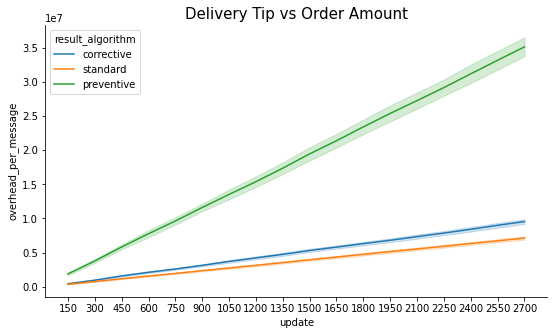

In [20]:
# Import dataset as a pandas dataframe
data_neg_30_del_10 =  all_results[(all_results['negation_probability'] =='30')] 
display(data_neg_30_del_10.head(20))

fig, ax = plt.subplots(figsize=(9,5))
sns.lineplot(data=data_neg_30_del_10, x="update", y="overhead_per_message", ci='sd', hue="result_algorithm")
sns.despine()
ax.set_title("Delivery Tip vs Order Amount", fontsize=15)
plt.show()